## Price Prediction in Real Estate

In [1]:
 import pandas as pd

In [2]:
housing=pd.read_csv('data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

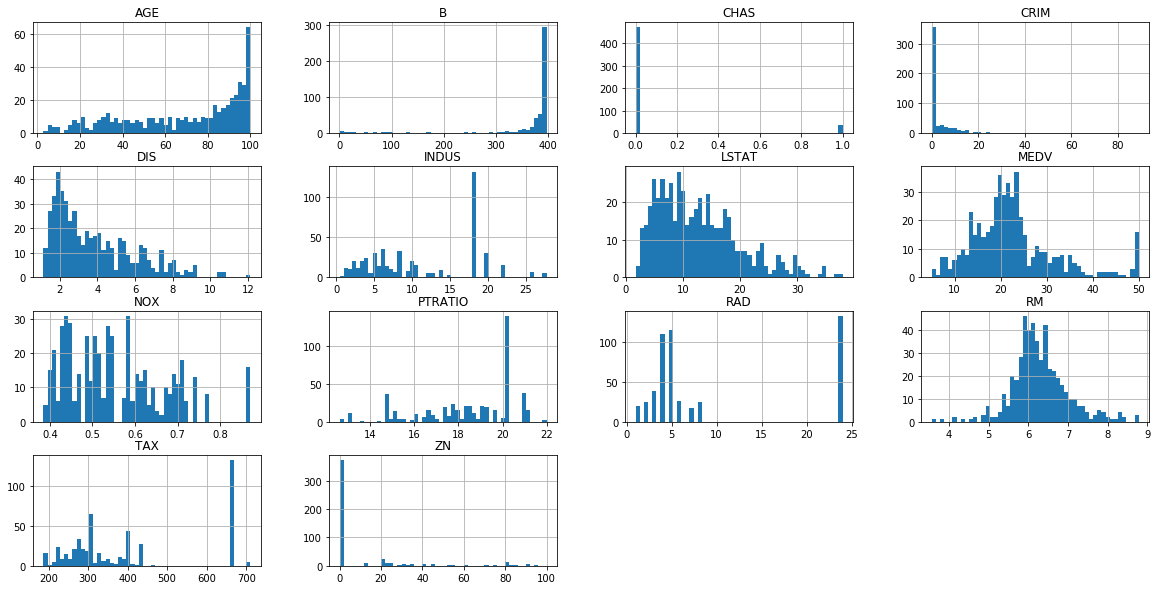

In [9]:
housing.hist(bins=50, figsize=(20,10))
plt.show()

## Train-Test Splitting

In [10]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in tesr set:{len(test_set)}\n ")

Rows in train set:404
Rows in tesr set:102
 


In [11]:
# for stratified split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [12]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [13]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [14]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
#ratio of 0's and 1's in the test_set
95/7

13.571428571428571

In [16]:
376/28

13.428571428571429

In [17]:
housing =  strat_train_set.copy()

## Looking for Correlations

In [18]:
corr_matrix = housing.corr()
# taking the prices i.e. MEDV to cotrrelate the data-set
corr_matrix['MEDV'].sort_values()

LSTAT     -0.740494
PTRATIO   -0.493534
INDUS     -0.473516
TAX       -0.456657
NOX       -0.422873
CRIM      -0.393715
RAD       -0.374693
AGE       -0.364596
CHAS       0.205066
DIS        0.240451
ZN         0.339741
B          0.361761
RM         0.680857
MEDV       1.000000
Name: MEDV, dtype: float64

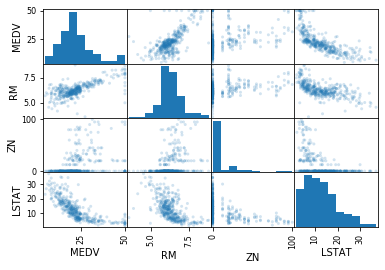

In [19]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV','RM', 'ZN','LSTAT']
scatter_matrix(housing[attributes],alpha=0.2)
plt.show()

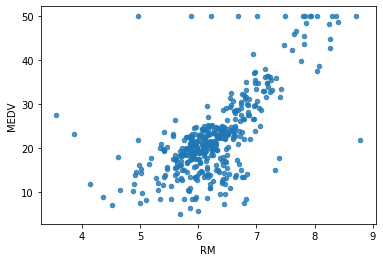

In [20]:
housing.plot(kind= 'scatter', x= 'RM', y= 'MEDV', alpha=0.8)
# alpha -> to see the scatter plot darker

## Attribute Combinations

In [21]:
housing['TAXRM']= housing['TAX']/housing['RM']

In [22]:
housing['TAXRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [23]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [24]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values()

LSTAT     -0.740494
TAXRM     -0.528626
PTRATIO   -0.493534
INDUS     -0.473516
TAX       -0.456657
NOX       -0.422873
CRIM      -0.393715
RAD       -0.374693
AGE       -0.364596
CHAS       0.205066
DIS        0.240451
ZN         0.339741
B          0.361761
RM         0.680857
MEDV       1.000000
Name: MEDV, dtype: float64

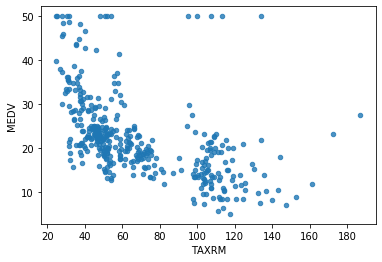

In [25]:
housing.plot(kind= 'scatter', x= 'TAXRM', y= 'MEDV', alpha=0.8)
# now we can remove these outlayers at 50 in y axis

In [26]:
housing = strat_train_set.drop('MEDV',axis=1)
housing_labels= strat_train_set['MEDV'].copy()

## Imputation transformer for completing missing values

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [28]:
X = imputer.transform(housing)

In [29]:
housing_tr = pd.DataFrame(X, columns= housing.columns)

In [30]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [32]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [33]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [34]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Real Estates

## Using Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr, housing_labels)

LinearRegression()

In [36]:
some_data = housing.iloc[:5]

In [37]:
some_labels = housing_labels.iloc[:5]

In [38]:
prepared_data = my_pipeline.transform(some_data)

In [39]:
model.predict(prepared_data)

array([23.99866812, 27.25283558, 20.5818147 , 25.04908672, 23.77464206])

In [40]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the Model

In [41]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [42]:
mse

23.380136328422374

## Using Decision Tree Regressor

In [43]:
# Because of such heavy error we use DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)

DecisionTreeRegressor()

In [44]:
some_data = housing.iloc[:5]

In [45]:
some_labels = housing_labels.iloc[:5]

In [46]:
prepared_data = my_pipeline.transform(some_data)

In [47]:
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [48]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the Model

In [49]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [50]:
mse

0.0

## Using better evaluation technique - Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score( model , housing_num_tr, housing_labels, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

In [52]:
rmse_scores

array([5.14328041, 4.36631325, 5.20878887, 5.32262815, 3.19568068])

 ## Cross Validation on Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr, housing_labels)

LinearRegression()

In [54]:
some_data = housing.iloc[:5]

In [55]:
some_labels = housing_labels.iloc[:5]

In [56]:
prepared_data = my_pipeline.transform(some_data)

In [57]:
model.predict(prepared_data)

array([23.99866812, 27.25283558, 20.5818147 , 25.04908672, 23.77464206])

In [58]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [59]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [60]:
mse

23.380136328422374

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score( model , housing_num_tr, housing_labels, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

In [62]:
rmse_scores

array([4.21554054, 4.47792731, 4.98595284, 6.34383266, 5.28161956])

In [63]:
def print_scores(scores):
    print("scores :", scores)
    print("Mean :", scores.mean())
    print("Standard deviation :", scores.std())

In [64]:
print_scores(rmse_scores)

scores : [4.21554054 4.47792731 4.98595284 6.34383266 5.28161956]
Mean : 5.060974580124904
Standard deviation : 0.7422587369479212


## Decision Tree performs better in this data-set

In [65]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)

DecisionTreeRegressor()

In [66]:
some_data = housing.iloc[:5]

In [67]:
some_labels = housing_labels.iloc[:5]

In [68]:
prepared_data = my_pipeline.transform(some_data)

In [69]:
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [70]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [71]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [72]:
mse

0.0

In [73]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score( model , housing_num_tr, housing_labels, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

In [74]:
rmse_scores

array([5.0521356 , 4.37848274, 5.32309202, 5.64518805, 3.18386558])

In [75]:
def print_scores(scores):
    print("scores :", scores)
    print("Mean :", scores.mean())
    print("Standard deviation :", scores.std())

In [76]:
print_scores(rmse_scores)

scores : [5.0521356  4.37848274 5.32309202 5.64518805 3.18386558]
Mean : 4.716552796523892
Standard deviation : 0.8725010674287934


## Saving the model

In [77]:
from joblib import dump, load
dump(model, 'Estates.joblib')

['Estates.joblib']

## Testing the model on test data

In [78]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[28.4 10.9 25.1 23.3 19.7 13.9 22.4 11.3 41.3 43.5 21.7 11.9 21.6 20.1
 19.  11.3 32.7 14.8 24.6 15.  19.6 14.5 11.9 21.7 16.1 31.6 17.1 31.6
 10.5 34.7 18.5 20.6 23.9 11.9 22.3  8.3 48.8 25.2 20.7 45.4 25.  22.8
 19.5 19.4 16.2 31.6 44.8 19.  20.6 23.1 24.5 13.1 22.4 17.1 29.1 31.7
 37.6 30.8 19.4 20.6 50.   5.6 17.5 23.9 16.7 28.7 17.4 13.2 21.4 36.2
 24.6 22.6 19.3 22.  32.7 13.9 15.6 19.4 20.6 21.  23.9 19.9 10.2 23.9
 23.3 21.2  8.7 22.  18.9 22.2 17.5 22.   6.3 26.6 21.9 29.9 24.5 28.7
  8.5 28.6 22.  27.1] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.0, 24.3, 19.8, 33.3, 7.0, 19.4, 20.9, 21.1, 20.4, 22.

In [79]:
final_rmse

4.141326868926687

In [80]:
# for testing purpose
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [81]:
from joblib import dump, load
import numpy as np
model = load('Estates.joblib')
features = np.array([[-0.43942006,  7.12628155, -3.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([21.9])